In [1]:
#### Read Inputs #### 

import pandas as pd
import numpy as np
import random
import math
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from datetime import date, timedelta

# Model (with month weights), iteratively trained, tested on testing dataset

In [10]:

# Because of the model runtime, split up the running of the code between all group members.
# Hence, we have multiple CSV files to combine for our full data.

output = pd.read_csv('!day 358.csv')
output2 = pd.read_csv('!day 374.csv')
output3 = pd.read_csv('!day 385.csv')
# output4 = pd.read_csv('!day 388.csv')
output5 = pd.read_csv('!day 423.csv')
output = pd.concat([output[0:50], output2]).reset_index(drop = True)
output = pd.concat([output, output3]).reset_index(drop = True)
output = pd.concat([output, output5]).reset_index(drop = True)
output = output.rename(columns={"loss_value_scams": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})
output["test_day"] += 305
output

,test_day,Value of detected scams,Hiring cost + Loss from undetected scams,prio1_det,prio2_det,prio3_det,prio4_det,prio1_undet,prio2_undet,prio3_undet,prio4_undet,prio1_false_positive,prio2_false_positive,prio3_false_positive,prio4_false_positive,prio1_true_neg,prio2_true_neg,prio3_true_neg,prio4_true_neg
0,305.0,12150.45,1018.25,1.0,0.0,5.0,0.0,5.0,4.0,1.0,1.0,83.0,26.0,17.0,0.0,698.0,245.0,664.0,13.0
1,306.0,6636.70,609.70,4.0,0.0,2.0,2.0,4.0,1.0,1.0,0.0,76.0,20.0,18.0,1.0,668.0,248.0,164.0,18.0
2,307.0,1655.80,741.25,3.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,66.0,12.0,19.0,2.0,699.0,261.0,135.0,9.0
3,308.0,2998.85,522.30,2.0,0.0,2.0,0.0,4.0,2.0,1.0,0.0,49.0,6.0,17.0,2.0,538.0,186.0,139.0,10.0
4,309.0,353.55,249.55,2.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,61.0,5.0,10.0,3.0,350.0,121.0,154.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,419.0,1089.10,320.20,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,51.0,6.0,9.0,0.0,338.0,149.0,148.0,8.0
115,420.0,136.90,0.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,11.0,12.0,1.0,339.0,120.0,160.0,11.0
116,421.0,249.10,284.75,2.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,57.0,3.0,6.0,4.0,350.0,124.0,164.0,7.0
117,422.0,3305.15,151.30,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,53.0,7.0,11.0,3.0,358.0,146.0,164.0,12.0


In [29]:
start_date = date(2023, 10, 1)
end_date = date(2025, 1, 1)
days = list(range(0,458, 1))
dates = pd.date_range(start_date,end_date-timedelta(days=1),freq='d')
date_dicts = dict(zip(days, dates))
output["Date"] = output["test_day"].map(date_dicts)
output.loc[output["Value of detected scams"] >= 8000]

,test_day,Value of detected scams,Hiring cost + Loss from undetected scams,prio1_det,prio2_det,prio3_det,prio4_det,prio1_undet,prio2_undet,prio3_undet,prio4_undet,prio1_false_positive,prio2_false_positive,prio3_false_positive,prio4_false_positive,prio1_true_neg,prio2_true_neg,prio3_true_neg,prio4_true_neg,Date
0,305.0,12150.45,1018.25,1.0,0.0,5.0,0.0,5.0,4.0,1.0,1.0,83.0,26.0,17.0,0.0,698.0,245.0,664.0,13.0,2024-08-01
10,315.0,8605.15,77.45,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,52.0,4.0,11.0,0.0,302.0,151.0,167.0,12.0,2024-08-11
61,366.0,9920.80,679.15,3.0,0.0,3.0,1.0,3.0,0.0,2.0,1.0,73.0,10.0,15.0,3.0,696.0,274.0,645.0,13.0,2024-10-01
62,367.0,61699.85,643.95,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,78.0,18.0,19.0,2.0,690.0,245.0,158.0,18.0,2024-10-02


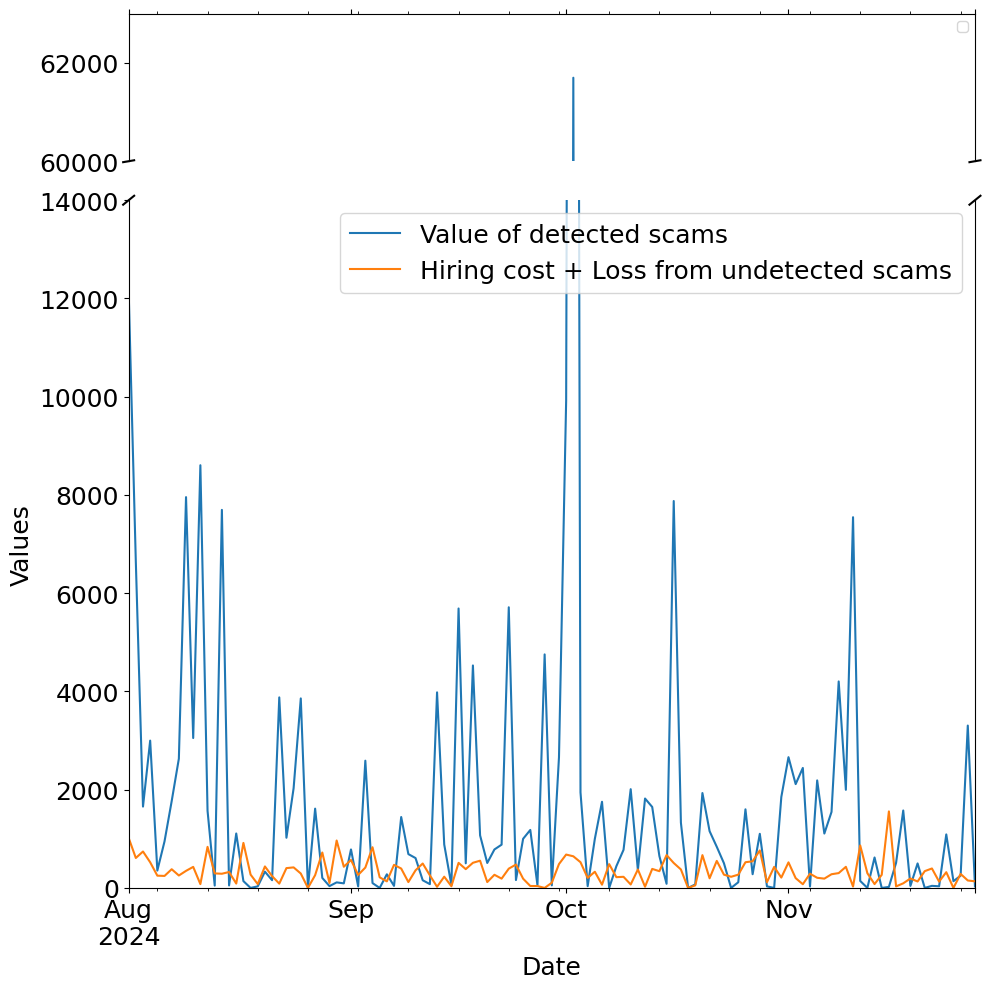

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True, gridspec_kw={'height_ratios': [1.5, 7]})

# First subplot. Zoomed-in y-axis
output.plot(x="Date", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[0], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[0].set_ylabel("")
axes[0].set_ylim(60000, 63000) 
axes[0].yaxis.set_major_locator(MultipleLocator(2000))  # Set y-axis ticks at intervals of 2000
axes[0].legend([])

# Plotting the second subplot. Zoomed-in y-axis
output.plot(x="Date", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[1], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Values")
axes[1].set_ylim(0, 14000)  # Adjust the limits as needed for your data
axes[1].legend()  # Provide an empty list to remove the legend

# Hide spines and ticks in the second subplot
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[0].xaxis.tick_top()
axes[0].tick_params(labeltop=False)  # Don't put tick labels at the top
axes[1].xaxis.tick_bottom()

# Set font size for various elements
font_size = 18  # Adjust the font size as needed
for ax in axes:
    ax.tick_params(axis='both', labelsize=font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize=font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=font_size)

axes[1].legend(fontsize=font_size)

# Add diagonal lines to indicate the break between subplots
d = .0065  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
axes[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
axes[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Show the plot
plt.tight_layout()
plt.savefig("1out Day-by-day; Model with weights on month bins.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [30]:
total_saved = sum(output["Value of detected scams"])
total_lost = sum(output["Hiring cost + Loss from undetected scams"])
row1 = [total_saved, total_lost]
row2 = [total_saved/(total_saved + total_lost)*100, total_lost/(total_saved+total_lost)*100]
saved_prop = pd.DataFrame([row1, row2])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "£{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "{:.2f}\%".format(x))
saved_prop["Index"] = ["Total £", "Proportion"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Money saved", "Money spent"]
display(saved_prop)
print(saved_prop.to_latex())

,Money saved,Money spent
Total £,£250939.25,£40121.80
Proportion,86.22\%,13.78\%


\begin{tabular}{lll}
\toprule
 & Money saved & Money spent \\
\midrule
Total £ & £250939.25 & £40121.80 \\
Proportion & 86.22\% & 13.78\% \\
\bottomrule
\end{tabular}



In [14]:
counts = output.iloc[:,3:11].sum(axis=0)
diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [counts[0]/(counts[0] + counts[4]), 
                                               counts[1]/(counts[1] + counts[5]), 
                                               counts[2]/(counts[2] + counts[6]),
                                               counts[3]/(counts[3] + counts[7])]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df["Investigation Success Rate"] = success_rate_df["Investigation Success Rate"].apply(lambda x: "{:.2f}\%".format(x * 100))
display(success_rate_df)
print(success_rate_df.to_latex(index = False))

,Transaction Priority,Investigation Success Rate
0,1,41.20\%
1,2,13.89\%
2,3,62.23\%
3,4,43.64\%


\begin{tabular}{rl}
\toprule
Transaction Priority & Investigation Success Rate \\
\midrule
1 & 41.20\% \\
2 & 13.89\% \\
3 & 62.23\% \\
4 & 43.64\% \\
\bottomrule
\end{tabular}



In [15]:
more_counts = output.iloc[:,11:19].sum(axis=0)
false_positive_counts = sum(more_counts[0:4])
true_negative_counts = sum(more_counts[4:8])
true_positive_counts = sum(counts[0:4])
false_negative_counts = sum(counts[4:8])

table = pd.DataFrame([[true_positive_counts, false_positive_counts], [false_negative_counts, true_negative_counts]], columns= ["Fraud", "Not Fraud"])
table["Total"] = table.sum(axis=1)
table.loc[len(table)] = table.sum(axis=0)
table["Index"] = np.array(["Investigated", "Not investigated", "Total"])
table = table.set_index("Index")
table.index.name = None
table = table.astype(int)
display(table)
print(table.to_latex())

,Fraud,Not Fraud,Total
Investigated,343,9776,10119
Not investigated,438,86037,86475
Total,781,95813,96594


\begin{tabular}{lrrr}
\toprule
 & Fraud & Not Fraud & Total \\
\midrule
Investigated & 343 & 9776 & 10119 \\
Not investigated & 438 & 86037 & 86475 \\
Total & 781 & 95813 & 96594 \\
\bottomrule
\end{tabular}



# Retroactively applying fully-trained model over whole dataset

## Model with weights on month

In [34]:
trained = pd.read_csv('!full model with month weights.csv')
trained = trained.rename(columns={"loss_value_scams": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})
start_date = date(2023, 10, 1)
end_date = date(2025, 1, 1)
days = list(range(0,458, 1))
dates = pd.date_range(start_date,end_date-timedelta(days=1),freq='d')
date_dicts = dict(zip(days, dates))
trained["Date"] = trained["test_day"].map(date_dicts)

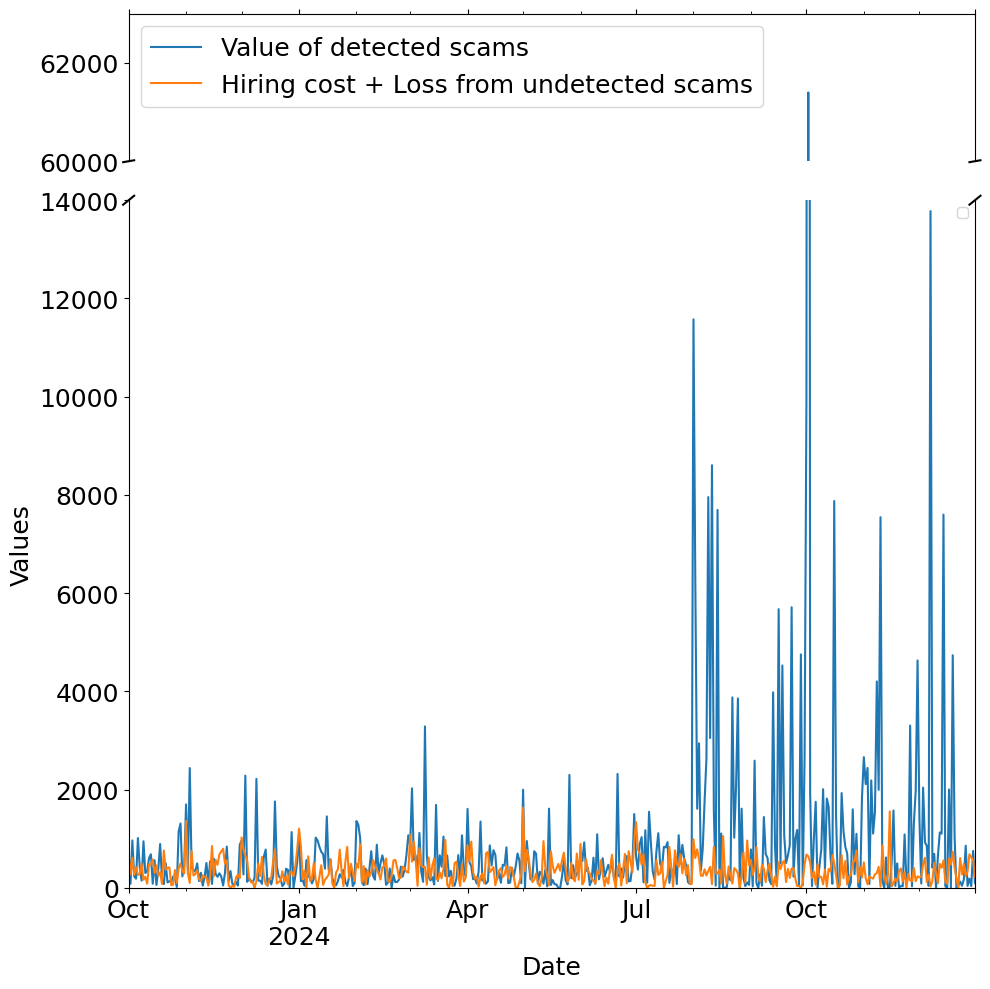

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True, gridspec_kw={'height_ratios': [1.5, 7]})

# First subplot. Zoomed-in y-axis
trained.plot(x="Date", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[0], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[0].set_ylabel("")
axes[0].set_ylim(60000, 63000) 
axes[0].yaxis.set_major_locator(MultipleLocator(2000))  # Set y-axis ticks at intervals of 2000
axes[0].legend()

# Plotting the second subplot. Zoomed-in y-axis
trained.plot(x="Date", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[1], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Values")
axes[1].set_ylim(0, 14000)  # Adjust the limits as needed for your data
axes[1].legend([])  # Provide an empty list to remove the legend

# Hide spines and ticks in the second subplot
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[0].xaxis.tick_top()
axes[0].tick_params(labeltop=False)  # Don't put tick labels at the top
axes[1].xaxis.tick_bottom()

# Set font size for various elements
font_size = 18  # Adjust the font size as needed
for ax in axes:
    ax.tick_params(axis='both', labelsize=font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize=font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=font_size)

axes[0].legend(fontsize=font_size)

# Add diagonal lines to indicate the break between subplots
d = .0065  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
axes[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
axes[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Show the plot
plt.tight_layout()
plt.savefig("2out Post-training; Model with weights on month bins.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [36]:
total_saved = sum(trained["Value of detected scams"])
total_lost = sum(trained["Hiring cost + Loss from undetected scams"])
row1 = [total_saved, total_lost]
row2 = [total_saved/(total_saved + total_lost)*100, total_lost/(total_saved+total_lost)*100]
saved_prop = pd.DataFrame([row1, row2])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "£{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "{:.2f}\%".format(x))
saved_prop["Index"] = ["Total £", "Proportion"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Money saved", "Money spent"]
display(saved_prop)
print(saved_prop.to_latex())

,Money saved,Money spent
Total £,£441423.35,£162045.30
Proportion,73.15\%,26.85\%


\begin{tabular}{lll}
\toprule
 & Money saved & Money spent \\
\midrule
Total £ & £441423.35 & £162045.30 \\
Proportion & 73.15\% & 26.85\% \\
\bottomrule
\end{tabular}



In [37]:
counts = trained.iloc[:,4:11].sum(axis=0)
diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [counts[0]/(counts[0] + counts[4]), 
                                               counts[1]/(counts[1] + counts[5]), 
                                               counts[2]/(counts[2] + counts[6]),
                                               counts[3]/(counts[3] + counts[7])]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df["Investigation Success Rate"] = success_rate_df["Investigation Success Rate"].apply(lambda x: "{:.2f}\%".format(x * 100))
display(success_rate_df)
print(success_rate_df.to_latex(index = False))

,Transaction Priority,Investigation Success Rate
0,1,99.95\%
1,2,53.15\%
2,3,27.46\%
3,4,54.22\%


\begin{tabular}{rl}
\toprule
Transaction Priority & Investigation Success Rate \\
\midrule
1 & 99.95\% \\
2 & 53.15\% \\
3 & 27.46\% \\
4 & 54.22\% \\
\bottomrule
\end{tabular}



In [309]:
more_counts = trained.iloc[:,11:19].sum(axis=0)
false_positive_counts = sum(more_counts[0:4])
true_negative_counts = sum(more_counts[4:8])
true_positive_counts = sum(counts[0:4])
false_negative_counts = sum(counts[4:8])

table = pd.DataFrame([[true_positive_counts, false_positive_counts], [false_negative_counts, true_negative_counts]], columns= ["Fraud", "Not Fraud"])
table["Total"] = table.sum(axis=1)
table.loc[len(table)] = table.sum(axis=0)
table["Index"] = np.array(["Investigated", "Not investigated", "Total"])
table = table.set_index("Index")
table.index.name = None
table = table.astype(int)
display(table)
print(table.to_latex())

,Fraud,Not Fraud,Total
Investigated,1629,30257,31886
Not investigated,1858,327936,329794
Total,3487,358193,361680


\begin{tabular}{lrrr}
\toprule
 & Fraud & Not Fraud & Total \\
\midrule
Investigated & 1629 & 30257 & 31886 \\
Not investigated & 1858 & 327936 & 329794 \\
Total & 3487 & 358193 & 361680 \\
\bottomrule
\end{tabular}



In [295]:
trained = trained.iloc[:305, :]

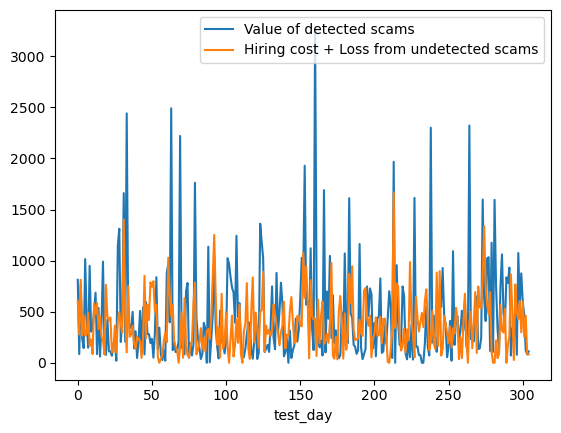

,Money saved,Money lost
Total £,£139545.60,£113594.80
Proportion,55.13\%,44.87\%


\begin{tabular}{lll}
\toprule
 & Money saved & Money lost \\
\midrule
Total £ & £139545.60 & £113594.80 \\
Proportion & 55.13\% & 44.87\% \\
\bottomrule
\end{tabular}



,Transaction Priority,Investigation Success Rate
0,1,53.80\%
1,2,31.28\%
2,3,48.71\%
3,4,34.75\%


\begin{tabular}{rl}
\toprule
Transaction Priority & Investigation Success Rate \\
\midrule
1 & 53.80\% \\
2 & 31.28\% \\
3 & 48.71\% \\
4 & 34.75\% \\
\bottomrule
\end{tabular}



,Fraud,Not Fraud,Total
Investigated,1206,18479,19685
Not investigated,1275,217197,218472
Total,2481,235676,238157


\begin{tabular}{lrrr}
\toprule
 & Fraud & Not Fraud & Total \\
\midrule
Investigated & 1206 & 18479 & 19685 \\
Not investigated & 1275 & 217197 & 218472 \\
Total & 2481 & 235676 & 238157 \\
\bottomrule
\end{tabular}



In [296]:
plot = trained.plot(x = "test_day", y = ["Value of detected scams", "Hiring cost + Loss from undetected scams"])
plt.savefig("Post-training; Model with weights on month bins.pdf", format = "pdf", bbox_inches = "tight")
plt.show()
total_saved = sum(trained["Value of detected scams"])
total_lost = sum(trained["Hiring cost + Loss from undetected scams"])
row1 = [total_saved, total_lost]
row2 = [total_saved/(total_saved + total_lost)*100, total_lost/(total_saved+total_lost)*100]
saved_prop = pd.DataFrame([row1, row2])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "£{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "{:.2f}\%".format(x))
saved_prop["Index"] = ["Total £", "Proportion"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Money saved", "Money spent"]
display(saved_prop)
print(saved_prop.to_latex())
counts = trained.iloc[:,3:11].sum(axis=0)
diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [counts[0]/(counts[0] + counts[4]), 
                                               counts[1]/(counts[1] + counts[5]), 
                                               counts[2]/(counts[2] + counts[6]),
                                               counts[3]/(counts[3] + counts[7])]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df["Investigation Success Rate"] = success_rate_df["Investigation Success Rate"].apply(lambda x: "{:.2f}\%".format(x * 100))
display(success_rate_df)
print(success_rate_df.to_latex(index = False))
more_counts = trained.iloc[:,11:19].sum(axis=0)
false_positive_counts = sum(more_counts[0:4])
true_negative_counts = sum(more_counts[4:8])
true_positive_counts = sum(counts[0:4])
false_negative_counts = sum(counts[4:8])

table = pd.DataFrame([[true_positive_counts, false_positive_counts], [false_negative_counts, true_negative_counts]], columns= ["Fraud", "Not Fraud"])
table["Total"] = table.sum(axis=1)
table.loc[len(table)] = table.sum(axis=0)
table["Index"] = np.array(["Investigated", "Not investigated", "Total"])
table = table.set_index("Index")
table.index.name = None
table = table.astype(int)
display(table)
print(table.to_latex())

## Model with no weights on month

In [303]:
trained2 = pd.read_csv('!full model without month weights.csv')
trained2 = trained2.rename(columns={"loss_value_scams": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})

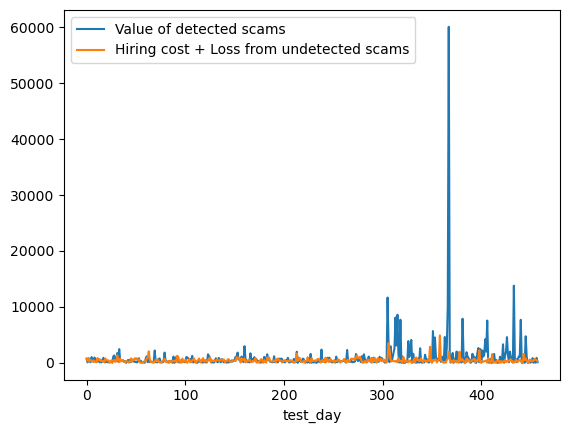

In [304]:

plot = trained2.plot(x = "test_day", y = ["Value of detected scams", "Hiring cost + Loss from undetected scams"])
plt.savefig("Day-by-day; Model with weights on month bins.pdf", format = "pdf", bbox_inches = "tight")

In [301]:
total_saved = sum(trained2["Value of detected scams"])
total_lost = sum(trained2["Hiring cost + Loss from undetected scams"])
row1 = [total_saved, total_lost]
row2 = [total_saved/(total_saved + total_lost)*100, total_lost/(total_saved+total_lost)*100]
saved_prop = pd.DataFrame([row1, row2])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "£{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "{:.2f}\%".format(x))
saved_prop["Index"] = ["Total £", "Proportion"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Money saved", "Money spent"]
display(saved_prop)
print(saved_prop.to_latex())

,Money saved,Money lost
Total £,£131842.15,£121448.25
Proportion,52.05\%,47.95\%


\begin{tabular}{lll}
\toprule
 & Money saved & Money lost \\
\midrule
Total £ & £131842.15 & £121448.25 \\
Proportion & 52.05\% & 47.95\% \\
\bottomrule
\end{tabular}



In [302]:
counts = trained2.iloc[:,3:11].sum(axis=0)
diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [counts[0]/(counts[0] + counts[4]), 
                                               counts[1]/(counts[1] + counts[5]), 
                                               counts[2]/(counts[2] + counts[6]),
                                               counts[3]/(counts[3] + counts[7])]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df["Investigation Success Rate"] = success_rate_df["Investigation Success Rate"].apply(lambda x: "{:.2f}\%".format(x * 100))
display(success_rate_df)
print(success_rate_df.to_latex(index = False))

,Transaction Priority,Investigation Success Rate
0,1,49.35\%
1,2,29.41\%
2,3,46.99\%
3,4,31.91\%


\begin{tabular}{rl}
\toprule
Transaction Priority & Investigation Success Rate \\
\midrule
1 & 49.35\% \\
2 & 29.41\% \\
3 & 46.99\% \\
4 & 31.91\% \\
\bottomrule
\end{tabular}



In [280]:
more_counts = trained.iloc[:,11:19].sum(axis=0)
false_positive_counts = sum(more_counts[0:4])
true_negative_counts = sum(more_counts[4:8])
true_positive_counts = sum(counts[0:4])
false_negative_counts = sum(counts[4:8])

table = pd.DataFrame([[true_positive_counts, false_positive_counts], [false_negative_counts, true_negative_counts]], columns= ["Fraud", "Not Fraud"])
table["Total"] = table.sum(axis=1)
table.loc[len(table)] = table.sum(axis=0)
table["Index"] = np.array(["Investigated", "Not investigated", "Total"])
table = table.set_index("Index")
table.index.name = None
table = table.astype(int)
display(table)
print(table.to_latex())

,Fraud,Not Fraud,Total
Investigated,1519,30257,31776
Not investigated,1968,327936,329904
Total,3487,358193,361680


\begin{tabular}{lrrr}
\toprule
 & Fraud & Not Fraud & Total \\
\midrule
Investigated & 1519 & 30257 & 31776 \\
Not investigated & 1968 & 327936 & 329904 \\
Total & 3487 & 358193 & 361680 \\
\bottomrule
\end{tabular}



# Bayes (No false negatives)

In [27]:
bayes = pd.read_csv('!bayes full v1 (trial 1).csv')
bayes = bayes.rename(columns={"loss_value_scams": "Hiring cost + Loss from undetected scams", "gain_value": "Value of detected scams"})
display(bayes.loc[bayes["Value of detected scams"] >= 10000])
display(output.loc[output["Value of detected scams"] >= 10000])

,test_day,Value of detected scams,Hiring cost + Loss from undetected scams,prio1_det,prio2_det,prio3_det,prio4_det,prio1_undet,prio2_undet,prio3_undet,prio4_undet,prio1_false_positive,prio2_false_positive,prio3_false_positive,prio4_false_positive,prio1_true_neg,prio2_true_neg,prio3_true_neg,prio4_true_neg
0,306.0,12058.95,577.45,4.0,1.0,2.0,2.0,4.0,0.0,1.0,0.0,172.0,85.0,9.0,0.0,572.0,183.0,173.0,19.0
60,366.0,14157.60,662.35,3.0,0.0,3.0,1.0,3.0,0.0,2.0,1.0,167.0,57.0,8.0,3.0,602.0,227.0,652.0,13.0
61,367.0,65039.85,643.95,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,155.0,56.0,11.0,2.0,614.0,207.0,166.0,18.0
127,433.0,13778.55,29.90,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,61.0,5.0,12.0,0.0,336.0,143.0,157.0,13.0


,test_day,Value of detected scams,Hiring cost + Loss from undetected scams,prio1_det,prio2_det,prio3_det,prio4_det,prio1_undet,prio2_undet,prio3_undet,prio4_undet,prio1_false_positive,prio2_false_positive,prio3_false_positive,prio4_false_positive,prio1_true_neg,prio2_true_neg,prio3_true_neg,prio4_true_neg,Date
0,305.0,12150.45,1018.25,1.0,0.0,5.0,0.0,5.0,4.0,1.0,1.0,83.0,26.0,17.0,0.0,698.0,245.0,664.0,13.0,2024-08-01
62,367.0,61699.85,643.95,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,78.0,18.0,19.0,2.0,690.0,245.0,158.0,18.0,2024-10-02


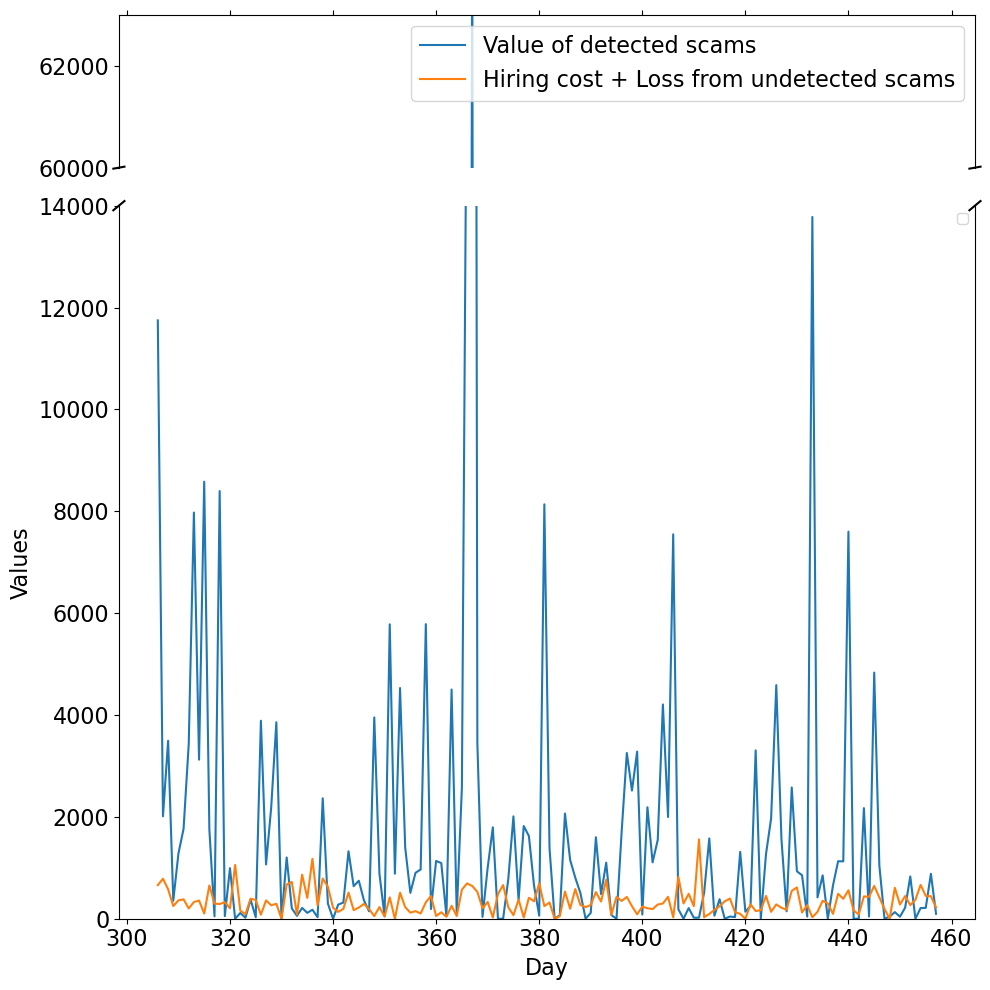

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True, gridspec_kw={'height_ratios': [1.5, 7]})

# First subplot. Zoomed-in y-axis
bayes.plot(x="test_day", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[0], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[0].set_ylabel("")
axes[0].set_ylim(60000, 63000) 
axes[0].yaxis.set_major_locator(MultipleLocator(2000))  # Set y-axis ticks at intervals of 2000
axes[0].legend()

# Plotting the second subplot. Zoomed-in y-axis
bayes.plot(x="test_day", y=["Value of detected scams", "Hiring cost + Loss from undetected scams"], ax=axes[1], label=["Value of detected scams", "Hiring cost + Loss from undetected scams"])
axes[1].set_xlabel("Day")
axes[1].set_ylabel("Values")
axes[1].set_ylim(0, 14000)  # Adjust the limits as needed for your data
axes[1].legend([])  # Provide an empty list to remove the legend

# Hide spines and ticks in the second subplot
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[0].xaxis.tick_top()
axes[0].tick_params(labeltop=False)  # Don't put tick labels at the top
axes[1].xaxis.tick_bottom()

# Set font size for various elements
font_size = 16  # Adjust the font size as needed
for ax in axes:
    ax.tick_params(axis='both', labelsize=font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize=font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=font_size)

axes[0].legend(fontsize=font_size)

# Add diagonal lines to indicate the break between subplots
d = .0065  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
axes[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
axes[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Show the plot
plt.tight_layout()
plt.savefig("3out Day-by-day, No False Negatives.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [33]:
total_saved = sum(bayes["Value of detected scams"])
total_lost = sum(bayes["Hiring cost + Loss from undetected scams"])
row1 = [total_saved, total_lost]
row2 = [total_saved/(total_saved + total_lost)*100, total_lost/(total_saved+total_lost)*100]
saved_prop = pd.DataFrame([row1, row2])
saved_prop.iloc[0] = saved_prop.iloc[0].apply(lambda x: "£{:.2f}".format(x))
saved_prop.iloc[1] = saved_prop.iloc[1].apply(lambda x: "{:.2f}\%".format(x))
saved_prop["Index"] = ["Total £", "Proportion"]
saved_prop = saved_prop.set_index("Index")
saved_prop.index.name = None
saved_prop.columns = ["Money saved", "Money spent"]
display(saved_prop)
print(saved_prop.to_latex())

,Money saved,Money lost
Total £,£311620.90,£50178.65
Proportion,86.13\%,13.87\%


\begin{tabular}{lll}
\toprule
 & Money saved & Money lost \\
\midrule
Total £ & £311620.90 & £50178.65 \\
Proportion & 86.13\% & 13.87\% \\
\bottomrule
\end{tabular}



In [34]:
counts = bayes.iloc[:,3:11].sum(axis=0)
diction_rate = {"Transaction Priority": [1,2,3,4],
                "Investigation Success Rate": [counts[0]/(counts[0] + counts[4]), 
                                               counts[1]/(counts[1] + counts[5]), 
                                               counts[2]/(counts[2] + counts[6]),
                                               counts[3]/(counts[3] + counts[7])]}
success_rate_df = pd.DataFrame.from_dict(diction_rate)
success_rate_df["Investigation Success Rate"] = success_rate_df["Investigation Success Rate"].apply(lambda x: "{:.2f}\%".format(x * 100))
display(success_rate_df)
print(success_rate_df.to_latex(index = False))

,Transaction Priority,Investigation Success Rate
0,1,42.88\%
1,2,16.16\%
2,3,61.06\%
3,4,53.73\%


\begin{tabular}{rl}
\toprule
Transaction Priority & Investigation Success Rate \\
\midrule
1 & 42.88\% \\
2 & 16.16\% \\
3 & 61.06\% \\
4 & 53.73\% \\
\bottomrule
\end{tabular}



In [334]:
more_counts = bayes.iloc[:,11:19].sum(axis=0)
false_positive_counts = sum(more_counts[0:4])
true_negative_counts = sum(more_counts[4:8])
true_positive_counts = sum(counts[0:4])
false_negative_counts = sum(counts[4:8])

table = pd.DataFrame([[true_positive_counts, false_positive_counts], [false_negative_counts, true_negative_counts]], columns= ["Fraud", "Not Fraud"])
table["Total"] = table.sum(axis=1)
table.loc[len(table)] = table.sum(axis=0)
table["Index"] = np.array(["Investigated", "Not investigated", "Total"])
table = table.set_index("Index")
table.index.name = None
table = table.astype(int)
display(table)
print(table.to_latex())

,Fraud,Not Fraud,Total
Investigated,446,13080,13526
Not investigated,543,107689,108232
Total,989,120769,121758


\begin{tabular}{lrrr}
\toprule
 & Fraud & Not Fraud & Total \\
\midrule
Investigated & 446 & 13080 & 13526 \\
Not investigated & 543 & 107689 & 108232 \\
Total & 989 & 120769 & 121758 \\
\bottomrule
\end{tabular}

